In [1]:
import numpy as np
import pandas as pd
import sys, math
import os, shutil
#import commands
import subprocess as commands
import re
import matplotlib.pyplot as plt

In [2]:
# Creating dataframe with magnet settings that result in the lowest distance
cmd = 'ls CommissioningResults/'
failure, output = commands.getstatusoutput(cmd)
bestSettings = []

for file in output.split("\n"):
    filename = 'CommissioningResults/' + file
    # Reading file with corrector values and measured distance between peaks
    reader = np.asmatrix(np.loadtxt(filename))
    x_observed = np.asarray(reader[:,0:4])
    f_observed = np.asarray(reader[:,4])
    bestSettings.append(np.concatenate([(x_observed[np.argmin(f_observed)]), min(f_observed), [filename[21:]]]))

df = pd.DataFrame(bestSettings, columns=['h13', 'v13', 'h31', 'v31', 'd', 'file'])
df = df.astype( dtype={'h13' : float, 'v13' : float, 'h31' : float, 'v31' : float, 'd': str})
df

,h13,v13,h31,v31,d,file
0,2.93160,-0.78320,2.095,0.469,0.0338,correctorValues_Distance-Run379.txt
1,-9.73320,5.56770,-1.584,25.842,0.0351,correctorValues_Distance_2_28_10pm.txt
2,-1.48069,14.23207,0.317,28.798,0.007719620200169283,correctorValues_Distance_2_28_12pm.txt
3,-2.42082,7.82157,2.154,14.236,0.03732183445056873,correctorValues_Distance_2_28_7pm.txt
4,10.65170,3.48040,9.197,20.203,0.0158,correctorValues_Distance_2_28_9pm.txt
5,-3.73630,-6.08290,7.193,14.704,0.045,correctorValues_Distance_3_1_6PM.txt
6,5.63930,13.47360,6.555,-0.383,0.0111,correctorValues_Distance_Run338A.txt
7,-0.80560,-3.05020,-4.990,3.130,0.0412,correctorValues_Distance_Run338B.txt
8,6.68740,3.25030,-7.460,14.400,0.019,correctorValues_Distance_Run338C.txt
9,-26.71190,-8.60640,7.121,-4.542,0.0634,correctorValues_Distance_Run341.txt


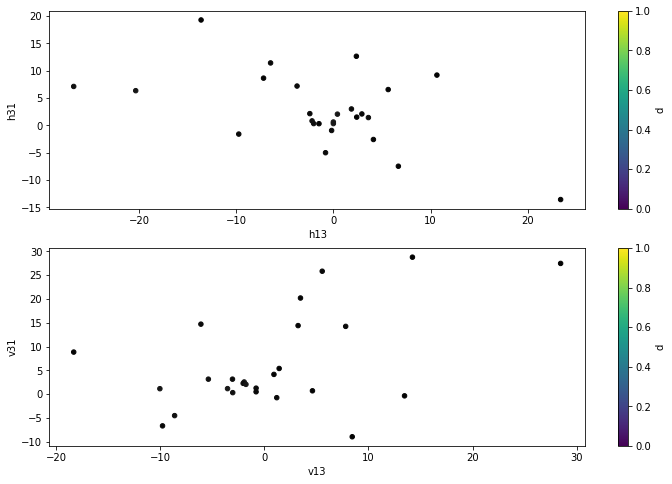

In [138]:
# Plotting correlations
fig, sub = plt.subplots(2, 1, figsize=(12, 8));
df.plot( kind = 'scatter', x = 'h13', y = 'h31', c = 'd', vmax=0.5, ax = sub[0])
df.plot( kind = 'scatter', x = 'v13', y = 'v31', c = 'd', ax = sub[1])
plt.show()